In [663]:
!pip install pandas
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

^C


In [ ]:
df = pd.read_csv(r'C:\Users\lehuy\OneDrive\Desktop\7. VPBANK\credit_card_transactions-ibm_v2.csv')

In [ ]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [ ]:
df2 = df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [ ]:
df2["Errors?"].value_counts()

Errors?
Insufficient Balance                                   242783
Bad PIN                                                 58918
Technical Glitch                                        48157
Bad Card Number                                         13321
Bad CVV                                                 10740
Bad Expiration                                          10716
Bad Zipcode                                              2079
Bad PIN,Insufficient Balance                              581
Insufficient Balance,Technical Glitch                     457
Bad PIN,Technical Glitch                                  128
Bad Card Number,Insufficient Balance                      122
Bad CVV,Insufficient Balance                               89
Bad Expiration,Insufficient Balance                        78
Bad Card Number,Bad CVV                                    60
Bad Card Number,Bad Expiration                             54
Bad Expiration,Bad CVV                                     47


In [ ]:
df2["Errors?"].value_counts().sum()

388431

In [ ]:
df2 = df2[df2['Errors?'].isna()]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23998469 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.9+ GB


In [ ]:
df3 = df2.copy()

In [ ]:
df3.drop(columns = ['Errors?','Merchant Name','Merchant City','Merchant State','Zip','MCC','Is Fraud?','Use Chip','Card'], inplace = True)

In [ ]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
Index: 23998469 entries, 0 to 24386899
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   User    int64 
 1   Year    int64 
 2   Month   int64 
 3   Day     int64 
 4   Time    object
 5   Amount  object
dtypes: int64(4), object(2)
memory usage: 1.3+ GB


,User,Year,Month,Day,Time,Amount
0,0,2002,9,1,06:21,$134.09
1,0,2002,9,1,06:42,$38.48
2,0,2002,9,2,06:22,$120.34
3,0,2002,9,2,17:45,$128.95
4,0,2002,9,3,06:23,$104.71


In [ ]:
df3['Invoice Date'] = pd.to_datetime(df3['Year'].astype(str) + '-' + df3['Month'].astype(str) + '-' + df3['Day'].astype(str) + ' ' + df3['Time'])

In [ ]:
df3.head()

,User,Year,Month,Day,Time,Amount,Invoice Date
0,0,2002,9,1,06:21,$134.09,2002-09-01 06:21:00
1,0,2002,9,1,06:42,$38.48,2002-09-01 06:42:00
2,0,2002,9,2,06:22,$120.34,2002-09-02 06:22:00
3,0,2002,9,2,17:45,$128.95,2002-09-02 17:45:00
4,0,2002,9,3,06:23,$104.71,2002-09-03 06:23:00


In [ ]:
df3.drop(columns = ['Year','Month','Day','Time'], inplace = True)

In [ ]:
df3.head()

,User,Amount,Invoice Date
0,0,$134.09,2002-09-01 06:21:00
1,0,$38.48,2002-09-01 06:42:00
2,0,$120.34,2002-09-02 06:22:00
3,0,$128.95,2002-09-02 17:45:00
4,0,$104.71,2002-09-03 06:23:00


In [ ]:
#xóa các dòng có giá trị missing
df3.dropna(inplace = True)

In [ ]:
df3.head()

,User,Amount,Invoice Date
0,0,$134.09,2002-09-01 06:21:00
1,0,$38.48,2002-09-01 06:42:00
2,0,$120.34,2002-09-02 06:22:00
3,0,$128.95,2002-09-02 17:45:00
4,0,$104.71,2002-09-03 06:23:00


In [ ]:
#chuyển định dạng cột Amount từ object sang float
df3['Amount'] = df3['Amount'].str.replace('$','').str.replace(',','').astype(float)


In [ ]:
#chỉ để lại những bản ghi có giá trị Amount > 0
df3 = df3[df3['Amount'] > 0]
#chỉ xét khoảng khách hàng từ năm 2010 trở lại đây
df3 = df3[df3['Invoice Date'].dt.year >= 2010]

In [ ]:
df3.info()
df3.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 15814609 entries, 2466 to 24386899
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   User          int64         
 1   Amount        float64       
 2   Invoice Date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 482.6 MB


,User,Amount,Invoice Date
count,1.581461e+07,1.581461e+07,15814609
mean,1.003361e+03,5.036831e+01,2015-03-22 22:59:19.754164992
min,0.000000e+00,1.000000e-02,2010-01-01 00:02:00
25%,5.150000e+02,1.108000e+01,2012-09-23 20:57:00
50%,1.008000e+03,3.179000e+01,2015-04-11 16:25:00
75%,1.478000e+03,6.572000e+01,2017-09-29 12:23:00
max,1.999000e+03,6.820200e+03,2020-02-28 23:58:00
std,5.698074e+02,7.373390e+01,NaN


In [ ]:
# count df3["Amount"]>0 
df3[df3["Amount"] >= 0].count()

User            15814609
Amount          15814609
Invoice Date    15814609
dtype: int64

RECENCY

In [ ]:
#in ra invoice date lớn nhất và nhỏ nhất
print(df3['Invoice Date'].max())
print(df3['Invoice Date'].min())


2020-02-28 23:58:00
2010-01-01 00:02:00


In [ ]:
#Bước 1: Tìm ngày mua gần nhất của mỗi khách hàng
recency = df3.groupby('User')['Invoice Date'].max().reset_index().rename(columns = {'Invoice Date':'Max Purchase Date'})
recency

,User,Max Purchase Date
0,0,2020-02-28 07:36:00
1,1,2020-02-27 11:23:00
2,2,2020-02-28 23:49:00
3,3,2020-02-28 22:58:00
4,4,2020-02-28 20:29:00
...,...,...
1982,1995,2020-02-28 22:51:00
1983,1996,2020-02-28 21:00:00
1984,1997,2020-02-28 12:33:00
1985,1998,2020-02-27 17:03:00


In [ ]:
#Bước 2: Tính toán cột mới là Recency
#đó là khoảng thời gian giữa ngày mua sắm gần nhất của mỗi khách hàng và ngày mua sắm gần nhất trong toàn bộ bộ dữ liệu
recency['Recency'] = (recency['Max Purchase Date'].max() - recency['Max Purchase Date']).dt.days
recency

,User,Max Purchase Date,Recency
0,0,2020-02-28 07:36:00,0
1,1,2020-02-27 11:23:00,1
2,2,2020-02-28 23:49:00,0
3,3,2020-02-28 22:58:00,0
4,4,2020-02-28 20:29:00,0
...,...,...,...
1982,1995,2020-02-28 22:51:00,0
1983,1996,2020-02-28 21:00:00,0
1984,1997,2020-02-28 12:33:00,0
1985,1998,2020-02-27 17:03:00,1


c:\Users\lehuy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


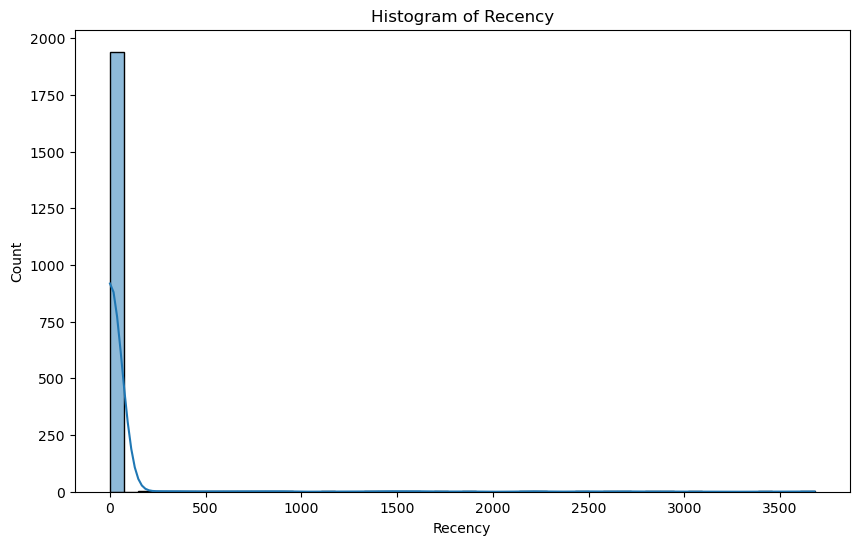

In [ ]:
#vẽ histogram của Recency -- SAU ĐÓ TÍNH MEAN, STD TỪ ĐÓ LOẠI CÁC OUTLIERS -- LÀM TƯƠNG TỰ (VẼ, TÍNH, LOẠI) CHO m, f
# !pip install -U scikit-learn
# !pip install seaborn
import seaborn as sns
plt.figure(figsize = (10,6))
sns.histplot(recency['Recency'], bins = 50, kde = True)
plt.title('Histogram of Recency')
plt.show()

In [ ]:
print('Mean of Recency:', recency['Recency'].mean())
print('Std of Recency:', recency['Recency'].std())
print('median of Recency:', recency['Recency'].median())
recency.describe()



Mean of Recency: 37.42878711625566
Std of Recency: 283.05500576871214
median of Recency: 0.0


,User,Max Purchase Date,Recency
count,1987.000000,1987,1987.000000
mean,1000.128837,2020-01-22 05:49:14.403623424,37.428787
min,0.000000,2010-01-30 20:45:00,0.000000
25%,501.500000,2020-02-28 10:44:00,0.000000
50%,1000.000000,2020-02-28 15:37:00,0.000000
75%,1499.500000,2020-02-28 19:42:30,0.000000
max,1999.000000,2020-02-28 23:58:00,3681.000000
std,577.231945,NaN,283.055006


In [ ]:
#loại bỏ outliers của Recency theo cách là loại theo tứ phân vị
q1 = recency['Recency'].quantile(0.25)
q3 = recency['Recency'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)
recency = recency[(recency['Recency'] >= q1 - 1.5*iqr) & (recency['Recency'] <= q3 + 1.5*iqr)]
#xóa những dòng có recency không thuộc phạm vi trên trong df3
df3 = df3[df3['User'].isin(recency['User'])]
df3.info()


0.0
0.0
0.0
<class 'pandas.core.frame.DataFrame'>
Index: 14593936 entries, 2466 to 24386899
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   User          int64         
 1   Amount        float64       
 2   Invoice Date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 445.4 MB


In [ ]:
#đếm số user trong df3
df3['User'].nunique()


1734

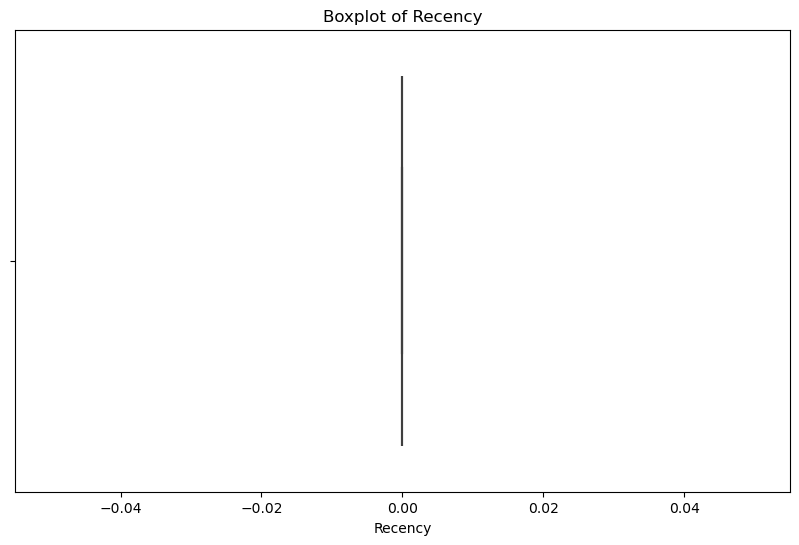

In [ ]:
#ve boxplot của Recency
plt.figure(figsize = (10,6))
sns.boxplot(x = recency['Recency'])
plt.title('Boxplot of Recency')
plt.show()


c:\Users\lehuy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


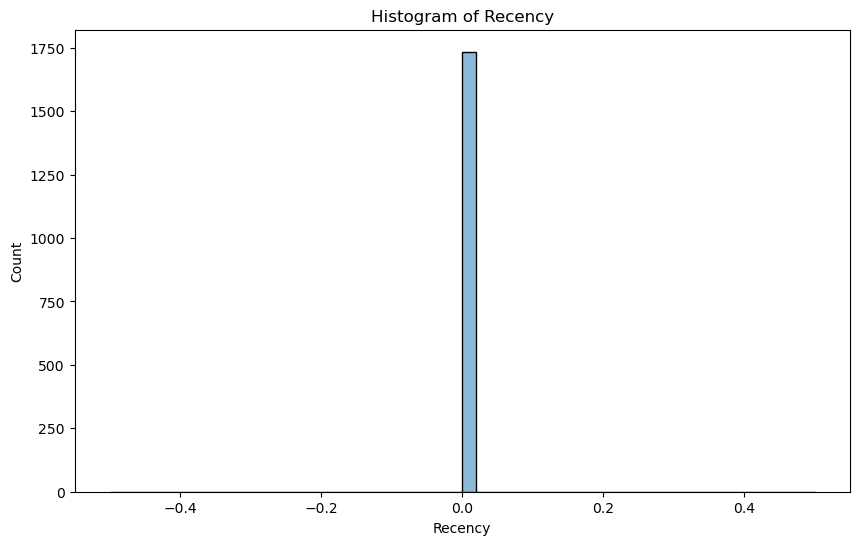

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(recency['Recency'], bins = 50, kde = True)
plt.title('Histogram of Recency')
plt.show()

c:\Users\lehuy\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\lehuy\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\lehuy\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\lehuy\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\lehuy\anaconda3\Lib\site-packages\s

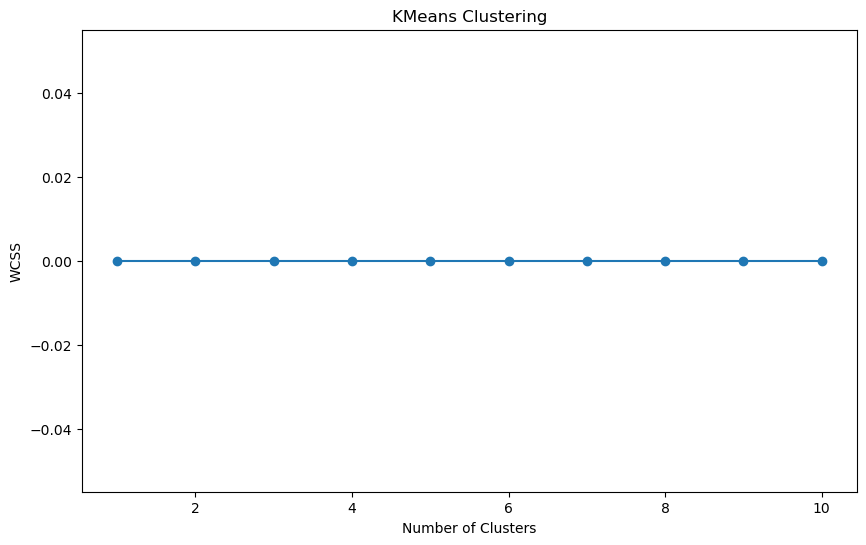

In [ ]:
from sklearn.cluster import KMeans
X = recency[['Recency']].values
wcss = []
K_values = range(1,11)

for K in K_values:
    kmeans = KMeans(n_clusters = K, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (10,6))
plt.plot(K_values, wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans Clustering')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(X)
recency['Cluster'] = kmeans.predict(X)
recency


c:\Users\lehuy\anaconda3\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\lehuy\AppData\Local\Temp\ipykernel_16420\86620121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recency['Cluster'] = kmeans.predict(X)


,User,Max Purchase Date,Recency,Cluster
0,0,2020-02-28 07:36:00,0,0
2,2,2020-02-28 23:49:00,0,0
3,3,2020-02-28 22:58:00,0,0
4,4,2020-02-28 20:29:00,0,0
5,5,2020-02-28 18:42:00,0,0
...,...,...,...,...
1981,1994,2020-02-28 16:29:00,0,0
1982,1995,2020-02-28 22:51:00,0,0
1983,1996,2020-02-28 21:00:00,0,0
1984,1997,2020-02-28 12:33:00,0,0


In [ ]:
#đếm số khách hàng còn lại sau khi loại bỏ outliers ở df3
print(recency['Cluster'].value_counts())
print(recency['Cluster'].value_counts().sum())


Cluster
0    1734
Name: count, dtype: int64
1734


In [ ]:
recency.groupby('Cluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1734.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def order_cluster(cluster_field_name, target_field_name, df, ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by = target_field_name, ascending = ascending).reset_index(drop = True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df, df_new[[cluster_field_name, 'index']], on = cluster_field_name)
    df_final = df_final.drop([cluster_field_name], axis = 1)
    df_final = df_final.rename(columns = {'index':cluster_field_name})
    return df_final

recency = order_cluster('Cluster', 'Recency', recency, False)
recency.groupby('Cluster')['Recency'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1734.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


FREQUENCY


In [ ]:
frequency = df3.groupby('User').size().reset_index(name = 'Frequency')
frequency

,User,Frequency
0,0,11030
1,2,25944
2,3,8398
3,4,9274
4,5,12001
...,...,...
1729,1994,74
1730,1995,11199
1731,1996,10234
1732,1997,11835


c:\Users\lehuy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


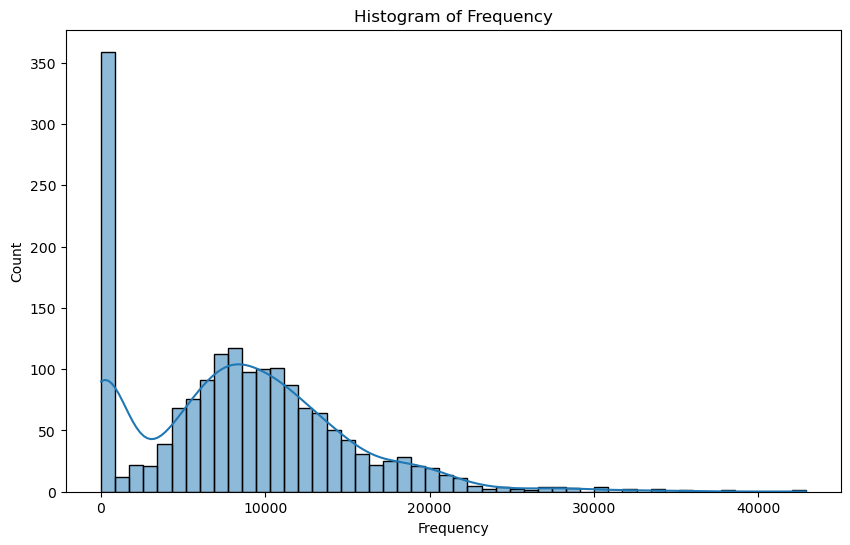

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(frequency['Frequency'], bins = 50, kde = True)
plt.title('Histogram of Frequency')
plt.show()


In [ ]:
#loại bỏ outliers của Recency theo cách là loại theo tứ phân vị
q1 = frequency['Frequency'].quantile(0.25)
q3 = frequency['Frequency'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)
frequency = frequency[(frequency['Frequency'] >= q1 - 1.5*iqr) & (frequency['Frequency'] <= q3 + 1.5*iqr)]
#xóa những dòng có recency không thuộc phạm vi trên trong df3
df3 = df3[df3['User'].isin(frequency['User'])]
df3.info()

                      


3846.25
11999.25
8153.0
<class 'pandas.core.frame.DataFrame'>
Index: 13767704 entries, 2466 to 24386899
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   User          int64         
 1   Amount        float64       
 2   Invoice Date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 420.2 MB


In [ ]:
#đếm số user trong df3
df3['User'].nunique()


1706

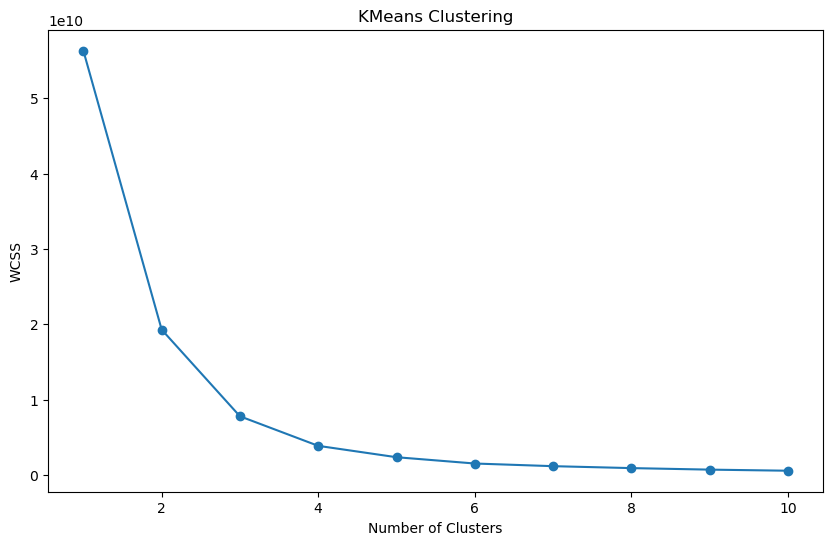

In [ ]:
Y = frequency[['Frequency']].values

wcss = []
K_values = range(1,11)

for K in K_values:
    kmeans = KMeans(n_clusters = K, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(K_values, wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans Clustering')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(Y)
frequency['Cluster'] = kmeans.predict(Y)
frequency


C:\Users\lehuy\AppData\Local\Temp\ipykernel_16420\1972618861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequency['Cluster'] = kmeans.predict(Y)


,User,Frequency,Cluster
0,0,11030,0
2,3,8398,0
3,4,9274,0
4,5,12001,0
5,6,20127,1
...,...,...,...
1729,1994,74,2
1730,1995,11199,0
1731,1996,10234,0
1732,1997,11835,0


In [ ]:
frequency.groupby('Cluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,825.0,8601.637576,2002.650811,4922.0,7031.00,8507.0,10306.0,12250.0
1,384.0,15977.020833,2883.511062,12291.0,13543.25,15190.0,18162.0,24184.0
2,497.0,1078.826962,1615.010775,14.0,90.00,169.0,1882.0,4804.0


In [ ]:
frequency = order_cluster('Cluster', 'Frequency', frequency, True)
frequency.groupby('Cluster')['Frequency'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,497.0,1078.826962,1615.010775,14.0,90.00,169.0,1882.0,4804.0
1,825.0,8601.637576,2002.650811,4922.0,7031.00,8507.0,10306.0,12250.0
2,384.0,15977.020833,2883.511062,12291.0,13543.25,15190.0,18162.0,24184.0


REVENUE


In [ ]:
#in ra min max của cột Amount
print(df3['Amount'].min())
print(df3['Amount'].max())

0.01
6820.2


In [ ]:
revenue = df3.groupby('User')['Amount'].sum().reset_index(name = 'Revenue')
revenue

,User,Revenue
0,0,963564.74
1,3,1198379.41
2,4,938665.95
3,5,709796.76
4,6,758204.32
...,...,...
1701,1994,5502.83
1702,1995,337942.65
1703,1996,469208.79
1704,1997,380879.70


c:\Users\lehuy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


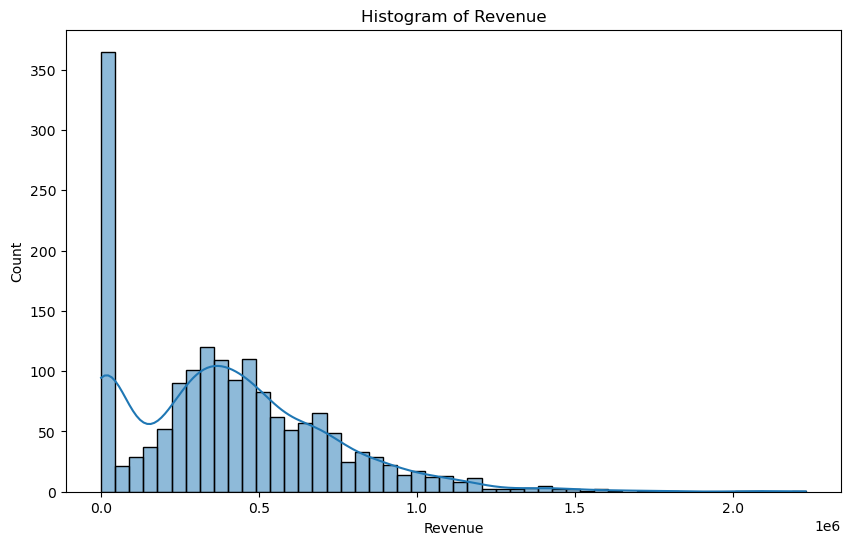

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(revenue['Revenue'], bins = 50, kde = True)
plt.title('Histogram of Revenue')
plt.show()




In [ ]:
#loại bỏ outliers của Recency theo cách là loại theo tứ phân vị
q1 = revenue['Revenue'].quantile(0.25)
q3 = revenue['Revenue'].quantile(0.75)
iqr = q3 - q1
print(q1)
print(q3)
print(iqr)
revenue = revenue[(revenue['Revenue'] >= q1 - 1.5*iqr) & (revenue['Revenue'] <= q3 + 1.5*iqr)]

#xóa những dòng có recency không thuộc phạm vi trên trong df3
df3 = df3[df3['User'].isin(revenue['User'])]
df3.info()

149164.5575
586672.3049999999
437507.74749999994
<class 'pandas.core.frame.DataFrame'>
Index: 13271427 entries, 2466 to 24386899
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   User          int64         
 1   Amount        float64       
 2   Invoice Date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 405.0 MB


In [ ]:
df3['User'].nunique()

1679

In [ ]:
Z = revenue[['Revenue']].values
k_range = range(1,11)
wcss = []

for K in k_range:
    kmeans = KMeans(n_clusters = K, init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)




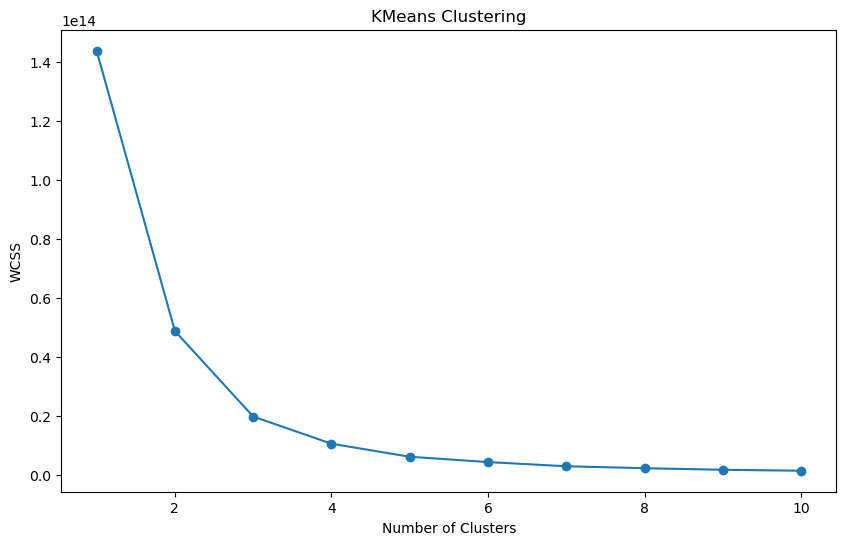

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(k_range, wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('KMeans Clustering')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
kmeans.fit(Z)
revenue['Cluster'] = kmeans.predict(Z)
revenue

C:\Users\lehuy\AppData\Local\Temp\ipykernel_16420\3464922129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['Cluster'] = kmeans.predict(Z)


,User,Revenue,Cluster
0,0,963564.74,0
1,3,1198379.41,0
2,4,938665.95,0
3,5,709796.76,0
4,6,758204.32,0
...,...,...,...
1701,1994,5502.83,1
1702,1995,337942.65,2
1703,1996,469208.79,2
1704,1997,380879.70,2


In [ ]:
revenue.groupby('Cluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,377.0,804514.989416,156248.305641,603224.76,677978.9600,756351.18,904454.060,1224229.88
1,506.0,48017.982984,70264.360371,122.03,4315.2200,8649.87,77413.165,223739.18
2,796.0,399330.537098,101302.177451,224304.32,316138.8525,391799.54,479842.865,601294.81


In [ ]:
revenue = order_cluster('Cluster', 'Revenue', revenue, True)

revenue.groupby('Cluster')['Revenue'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,506.0,48017.982984,70264.360371,122.03,4315.2200,8649.87,77413.165,223739.18
1,796.0,399330.537098,101302.177451,224304.32,316138.8525,391799.54,479842.865,601294.81
2,377.0,804514.989416,156248.305641,603224.76,677978.9600,756351.18,904454.060,1224229.88


In [ ]:
recency.head()

,User,Max Purchase Date,Recency,Cluster
0,0,2020-02-28 07:36:00,0,0
1,2,2020-02-28 23:49:00,0,0
2,3,2020-02-28 22:58:00,0,0
3,4,2020-02-28 20:29:00,0,0
4,5,2020-02-28 18:42:00,0,0


In [ ]:

rfm = recency.merge(frequency, on = 'User').merge(revenue, on = 'User')
rfm.drop(columns = ['Max Purchase Date'], inplace = True)
# đổi tên cột Cluster thành Cluster_Recency, Cluster_Frequency, Cluster_Revenue
rfm.rename(columns = {'Cluster_x':'Cluster_Recency'}, inplace = True)
rfm.rename(columns = {'Cluster_y':'Cluster_Frequency'}, inplace = True)
rfm.rename(columns = {'Cluster':'Cluster_Revenue'}, inplace = True)

rfm.head()





,User,Recency,Cluster_Recency,Frequency,Cluster_Frequency,Revenue,Cluster_Revenue
0,0,0,0,11030,1,963564.74,2
1,3,0,0,8398,1,1198379.41,2
2,4,0,0,9274,1,938665.95,2
3,5,0,0,12001,1,709796.76,2
4,6,0,0,20127,2,758204.32,2


In [ ]:
rfm['RFM Score'] = rfm['Cluster_Recency'] + rfm['Cluster_Frequency'] + rfm['Cluster_Revenue']
rfm.head()


,User,Recency,Cluster_Recency,Frequency,Cluster_Frequency,Revenue,Cluster_Revenue,RFM Score
0,0,0,0,11030,1,963564.74,2,3
1,3,0,0,8398,1,1198379.41,2,3
2,4,0,0,9274,1,938665.95,2,3
3,5,0,0,12001,1,709796.76,2,3
4,6,0,0,20127,2,758204.32,2,4


In [ ]:
rfm.groupby('RFM Score').agg({  'Recency':'mean',
                                'Frequency':'mean',
                                'Revenue':['mean','count']}).round(1)


Recency Frequency   Revenue      
             mean      mean      mean count
RFM Score                                  
0             0.0     761.8   34060.8   454
1             0.0    5887.6  241164.5    94
2             0.0    8402.6  393735.8   642
3             0.0   12246.4  615760.6   244
4             0.0   16283.8  833915.6   245

ketluan

In [ ]:
rfm['Segment'] = 'Low Value'
rfm.loc[(rfm['RFM Score'] > 1) & (rfm['RFM Score']<=3), 'Segment'] = 'Mid Value'
rfm.loc[rfm['RFM Score'] > 3, 'Segment'] = 'High Value'
rfm.head()


,User,Recency,Cluster_Recency,Frequency,Cluster_Frequency,Revenue,Cluster_Revenue,RFM Score,Segment
0,0,0,0,11030,1,963564.74,2,3,Mid Value
1,3,0,0,8398,1,1198379.41,2,3,Mid Value
2,4,0,0,9274,1,938665.95,2,3,Mid Value
3,5,0,0,12001,1,709796.76,2,3,Mid Value
4,6,0,0,20127,2,758204.32,2,4,High Value


In [ ]:
final_rfm = rfm.groupby('Segment').agg({'Recency':'mean',   
                                        'Frequency':'mean',
                                        'Revenue':'mean'}).round(1)
final_rfm


,Recency,Frequency,Revenue
Segment,,,
High Value,0.0,16283.8,833915.6
Low Value,0.0,1641.0,69585.9
Mid Value,0.0,9461.2,454880.3


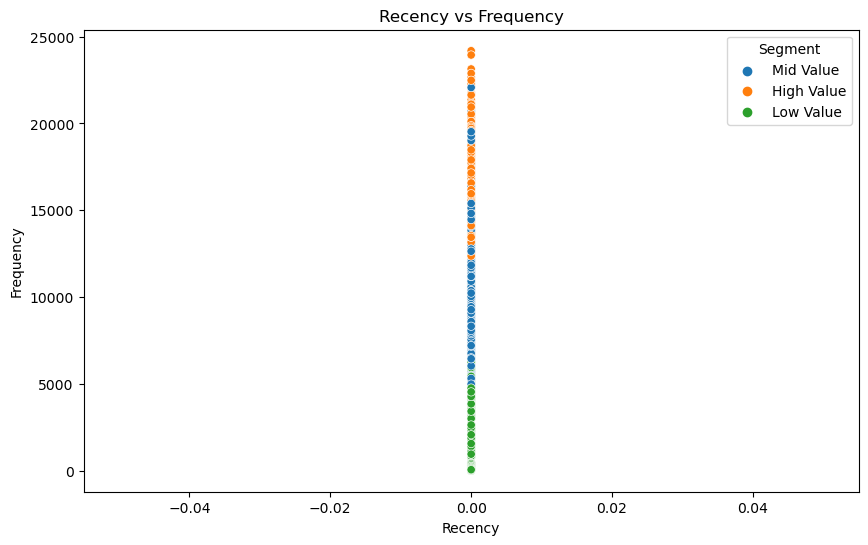

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = rfm, x = 'Recency', y = 'Frequency', hue = 'Segment')
plt.title('Recency vs Frequency')
plt.show()


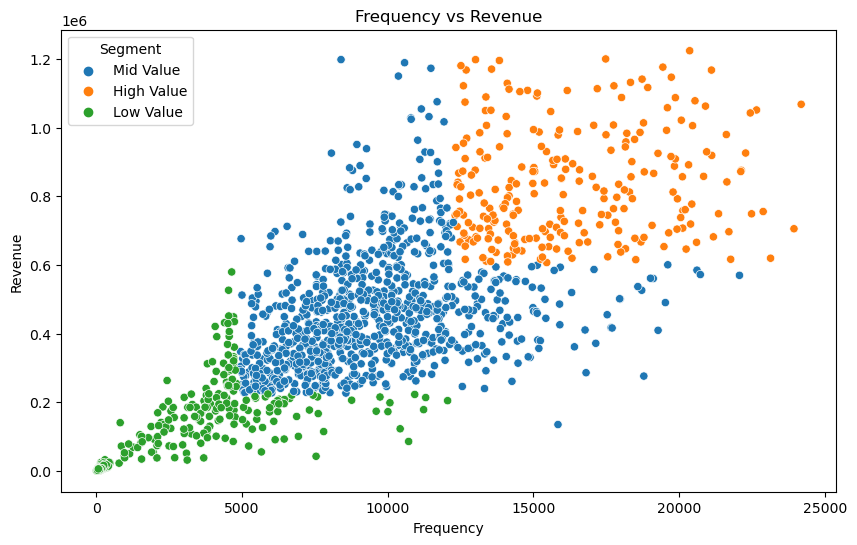

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = rfm, x = 'Frequency', y = 'Revenue', hue = 'Segment')
plt.title('Frequency vs Revenue')
plt.show()


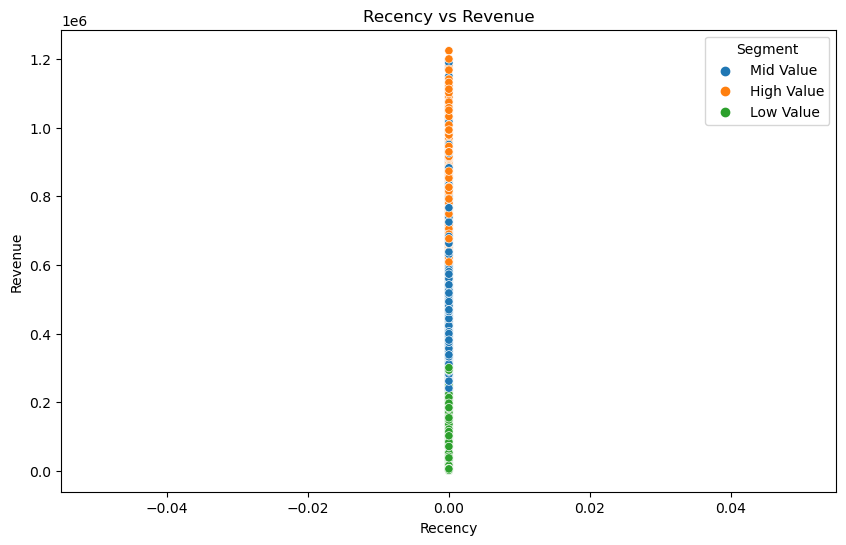

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = rfm, x = 'Recency', y = 'Revenue', hue = 'Segment')
plt.title('Recency vs Revenue')
plt.show()


In [ ]:
#in ra số lượng khách hàng theo từng phân khúc
rfm['Segment'].value_counts()


Segment
Mid Value     886
Low Value     548
High Value    245
Name: count, dtype: int64

In [ ]:
#save file rfm
rfm.to_csv(r'C:\Users\lehuy\OneDrive\Desktop\7. VPBANK\rfm.csv', index = False)

